In [ ]:
# prompt: import housing prices dataset from kaggle

import pandas as pd

# Replace 'your_kaggle_username' and 'your_kaggle_key' with your actual credentials
!pip install kaggle
!mkdir ~/.kaggle
!echo '{"username":"nashwin","key":"51a9cd633e9f35a94bf2fc7c3c19eb18"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle competitions download -c house-prices-advanced-regression-techniques -p /content/

# Unzip the dataset
!unzip /content/house-prices-advanced-regression-techniques.zip -d /content/

# Load the data into a pandas DataFrame
df_train = pd.read_csv("/content/train.csv")
df_test = pd.read_csv("/content/test.csv")

# Now you can work with the dataframes df_train and df_test
print(df_train.head())
print(df_test.head())

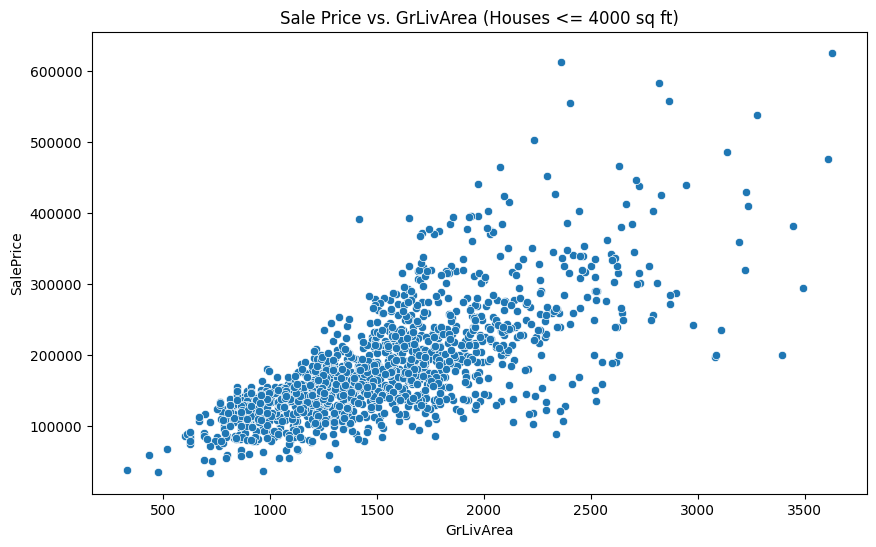

In [ ]:
# prompt: visualize sales price to grlivarea and remove house more than 4000 sft

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_train is already loaded as in the previous code

# Filter out houses with GrLivArea > 4000
df_filtered = df_train[df_train['GrLivArea'] <= 4000]

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_filtered)
plt.title('Sale Price vs. GrLivArea (Houses <= 4000 sq ft)')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

Correlation between MSZoning and SalePrice: -0.1726266378392472
Correlation between Street and SalePrice: 0.041917324173967825
Correlation between Alley and SalePrice: -0.09361842838345871
Correlation between LotShape and SalePrice: -0.25146380718654565
Correlation between LandContour and SalePrice: 0.012406785834058236
Correlation between Utilities and SalePrice: -0.014583884645339142
Correlation between LotConfig and SalePrice: -0.05147880484844108
Correlation between LandSlope and SalePrice: 0.05533013554030273
Correlation between Neighborhood and SalePrice: 0.2140599904747386
Correlation between Condition1 and SalePrice: 0.09482381480486603
Correlation between Condition2 and SalePrice: 0.007956848231846246
Correlation between BldgType and SalePrice: -0.08465634718070963
Correlation between HouseStyle and SalePrice: 0.17680066821159424
Correlation between RoofStyle and SalePrice: 0.2247124697792817
Correlation between RoofMatl and SalePrice: 0.08992931350254489
Correlation between E

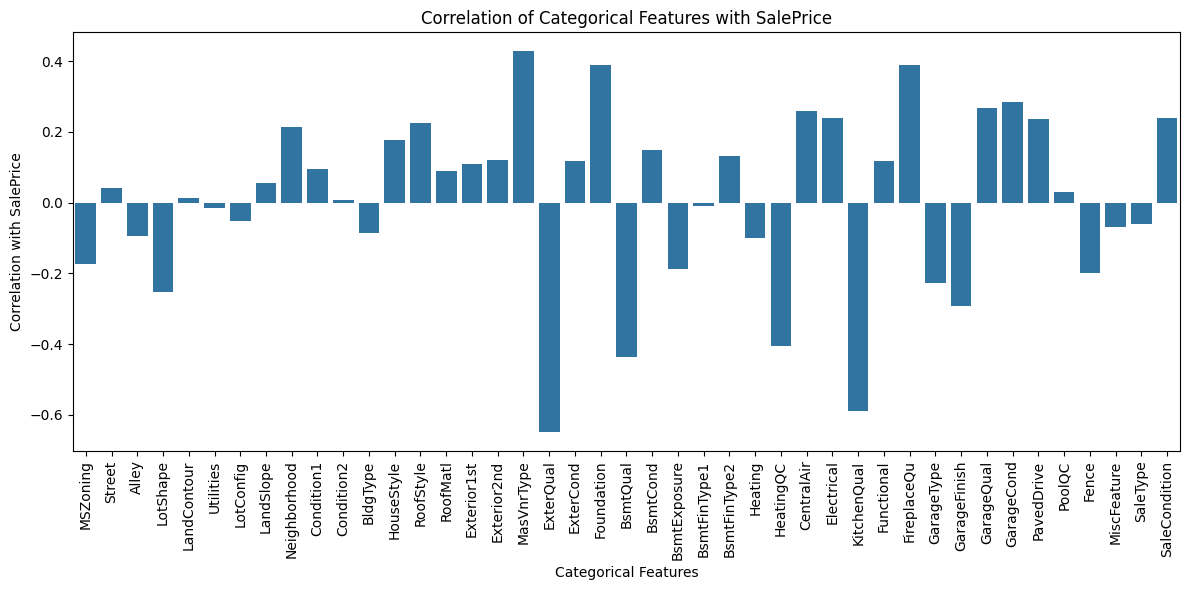

In [ ]:
# prompt: find correlation of all categories to sales price

# Assuming df_train is already loaded as in the previous code

# Calculate the correlation between all categorical features and SalePrice
categorical_cols = df_train.select_dtypes(include=['object']).columns
correlations = {}

for col in categorical_cols:
    # Convert categorical features to numerical using Label Encoding (or one-hot encoding if needed)
    df_temp = df_train.copy()  # Create a copy to avoid modifying the original DataFrame
    df_temp[col] = df_temp[col].astype('category').cat.codes

    correlation = df_temp[col].corr(df_temp['SalePrice'])
    correlations[col] = correlation

# Print the correlations
for col, corr in correlations.items():
    print(f"Correlation between {col} and SalePrice: {corr}")

# Optionally, create a bar plot of the correlations
plt.figure(figsize=(12, 6))
sns.barplot(x=list(correlations.keys()), y=list(correlations.values()))
plt.xticks(rotation=90)
plt.xlabel('Categorical Features')
plt.ylabel('Correlation with SalePrice')
plt.title('Correlation of Categorical Features with SalePrice')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()




Id              -0.027455
MSSubClass      -0.088160
LotFrontage      0.356773
LotArea          0.269866
OverallQual      0.800858
OverallCond     -0.080202
YearBuilt        0.535279
YearRemodAdd     0.521428
MasVnrArea       0.478862
BsmtFinSF1       0.395923
BsmtFinSF2      -0.008900
BsmtUnfSF        0.220678
TotalBsmtSF      0.646584
1stFlrSF         0.625235
2ndFlrSF         0.297301
LowQualFinSF    -0.025351
GrLivArea        0.720516
BsmtFullBath     0.235697
BsmtHalfBath    -0.036792
FullBath         0.559048
HalfBath         0.282925
BedroomAbvGr     0.160542
KitchenAbvGr    -0.138849
TotRmsAbvGrd     0.537462
Fireplaces       0.466765
GarageYrBlt      0.499230
GarageCars       0.649256
GarageArea       0.636964
WoodDeckSF       0.322538
OpenPorchSF      0.330361
EnclosedPorch   -0.129774
3SsnPorch        0.047414
ScreenPorch      0.118324
PoolArea         0.032819
MiscVal         -0.021097
MoSold           0.056797
YrSold          -0.023694
Name: SalePrice, dtype: float64


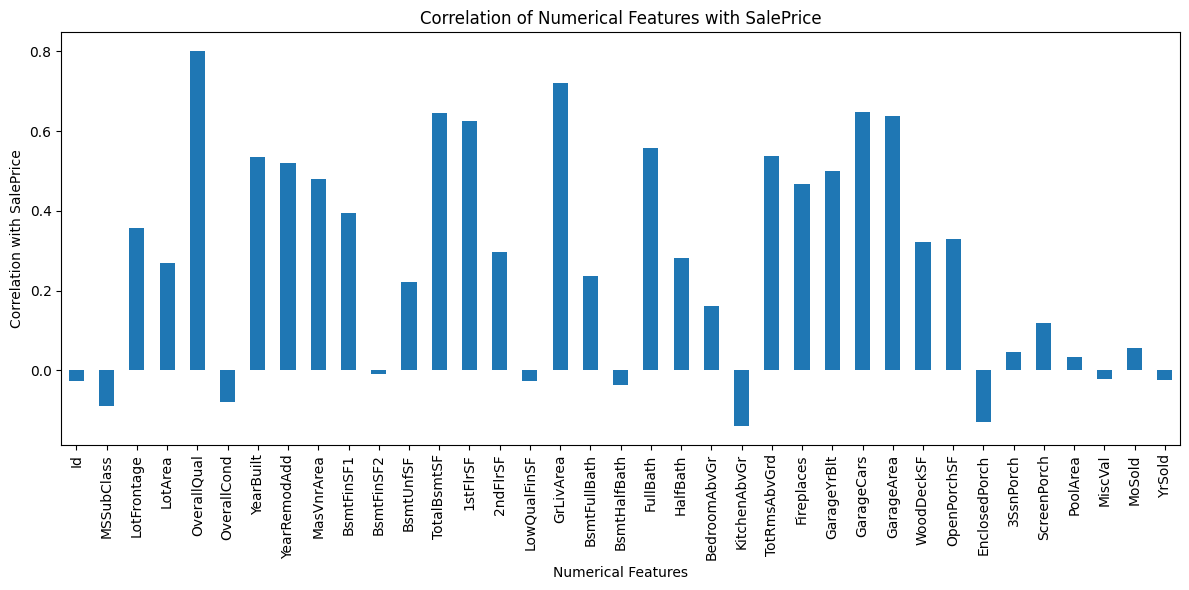

In [ ]:
# prompt: find correlation of all columns to sales price

# Assuming df_train is already loaded as in the previous code

# Calculate the correlation between all numerical features and SalePrice
numerical_cols = df_train.select_dtypes(include=['number']).columns
correlations = df_train[numerical_cols].corr()['SalePrice']

# Remove the correlation with SalePrice itself
correlations = correlations.drop('SalePrice')

# Print the correlations
print(correlations)

# Optionally, create a bar plot of the correlations
plt.figure(figsize=(12, 6))
correlations.plot(kind='bar')
plt.xlabel('Numerical Features')
plt.ylabel('Correlation with SalePrice')
plt.title('Correlation of Numerical Features with SalePrice')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



In [ ]:
for col, corr in correlations.items():
     print(f"Correlation between {col} and SalePrice: {corr}") if corr > 0.4 else None

Correlation between OverallQual and SalePrice: 0.8008583557130774
Correlation between YearBuilt and SalePrice: 0.535279432465636
Correlation between YearRemodAdd and SalePrice: 0.5214279601021217
Correlation between MasVnrArea and SalePrice: 0.47886229044239437
Correlation between TotalBsmtSF and SalePrice: 0.6465844979300707
Correlation between 1stFlrSF and SalePrice: 0.625234718651453
Correlation between GrLivArea and SalePrice: 0.7205163006738732
Correlation between FullBath and SalePrice: 0.5590482380074927
Correlation between TotRmsAbvGrd and SalePrice: 0.5374617670292877
Correlation between Fireplaces and SalePrice: 0.46676528347165486
Correlation between GarageYrBlt and SalePrice: 0.49922979324310146
Correlation between GarageCars and SalePrice: 0.6492563342986553
Correlation between GarageArea and SalePrice: 0.636963593025997


In [ ]:
# prompt: create a training set containing only columns where the correlation is greater than 0 , print the shape

# Assuming df_train and correlations are already defined as in the previous code

# Create a list of columns with positive correlation
positive_corr_cols = [col for col, corr in correlations.items() if corr > 0.4]

# Create a new DataFrame with only the selected columns
training_set = df_train[positive_corr_cols]

# Print the shape of the training set
print(training_set.shape)
print (training_set.head())


(1456, 13)
   OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  TotalBsmtSF  1stFlrSF  \
0            7       2003          2003       196.0          856       856   
1            6       1976          1976         0.0         1262      1262   
2            7       2001          2002       162.0          920       920   
3            7       1915          1970         0.0          756       961   
4            8       2000          2000       350.0         1145      1145   

   GrLivArea  FullBath  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0       1710         2             8           0       2003.0           2   
1       1262         2             6           1       1976.0           2   
2       1786         2             6           1       2001.0           2   
3       1717         1             7           1       1998.0           3   
4       2198         2             9           1       2000.0           3   

   GarageArea  
0         548  
1         460  
2        

In [ ]:
# prompt: to training_set merge the saleprice column from df_train

# Assuming df_train and training_set are already defined as in the previous code

# Merge 'SalePrice' column from df_train to training_set
training_set = pd.merge(training_set, df_train[['SalePrice']], left_index=True, right_index=True)

# Print the shape and head of the updated training set
print(training_set.shape)
print(training_set.head())

(1456, 14)
   OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  TotalBsmtSF  1stFlrSF  \
0            7       2003          2003       196.0          856       856   
1            6       1976          1976         0.0         1262      1262   
2            7       2001          2002       162.0          920       920   
3            7       1915          1970         0.0          756       961   
4            8       2000          2000       350.0         1145      1145   

   GrLivArea  FullBath  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0       1710         2             8           0       2003.0           2   
1       1262         2             6           1       1976.0           2   
2       1786         2             6           1       2001.0           2   
3       1717         1             7           1       1998.0           3   
4       2198         2             9           1       2000.0           3   

   GarageArea  SalePrice  
0         548     208500  
1  

In [ ]:
# prompt: use training_set, replace any non numerical data or missing data with a 0, and train a pytorch ANN with 5 fully connected layers to predict SalePrice, generate a plot of normalized entropy over the epochs

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming training_set is already defined and loaded as in the previous code

# Replace non-numerical data and missing values with 0
training_set = training_set.fillna(0)
for col in training_set.columns:
    if training_set[col].dtype == 'object':
        training_set[col] = training_set[col].astype('category').cat.codes

# Separate features (X) and target variable (y)
X = training_set.drop('SalePrice', axis=1).values
y = training_set['SalePrice'].values

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Define the ANN model
class ANN(nn.Module):
    def __init__(self, input_size):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.fc5(x)  # No activation on the output layer for regression
        return x

# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
model = ANN(input_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 1500
entropy_values = []
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    # Calculate and store entropy (example calculation - replace with your specific entropy calculation)
    with torch.no_grad():
        probabilities = torch.softmax(outputs, dim=1) # Assuming classification task
        entropy = -torch.sum(probabilities * torch.log(probabilities + 1e-8), dim=1).mean()
        entropy_values.append(entropy.item())

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')



NameError: name 'training_set' is not defined

Prediction: 141168.69, Actual: 184000.00, Percentage Error: 23.28%
Prediction: 189329.59, Actual: 181000.00, Percentage Error: 4.60%
Prediction: 129232.41, Actual: 145000.00, Percentage Error: 10.87%
Prediction: 151397.81, Actual: 115000.00, Percentage Error: 31.65%
Prediction: 108421.63, Actual: 84000.00, Percentage Error: 29.07%
Prediction: 84807.38, Actual: 75500.00, Percentage Error: 12.33%
Prediction: 200579.23, Actual: 311500.00, Percentage Error: 35.61%
Prediction: 129471.91, Actual: 104900.00, Percentage Error: 23.42%
Prediction: 175215.53, Actual: 158000.00, Percentage Error: 10.90%
Prediction: 127628.57, Actual: 135500.00, Percentage Error: 5.81%
Prediction: 125706.48, Actual: 119500.00, Percentage Error: 5.19%
Prediction: 391405.31, Actual: 359100.01, Percentage Error: 9.00%
Prediction: 215799.91, Actual: 213500.00, Percentage Error: 1.08%
Prediction: 222364.59, Actual: 214000.00, Percentage Error: 3.91%
Prediction: 101397.13, Actual: 55993.00, Percentage Error: 81.09%
Predi

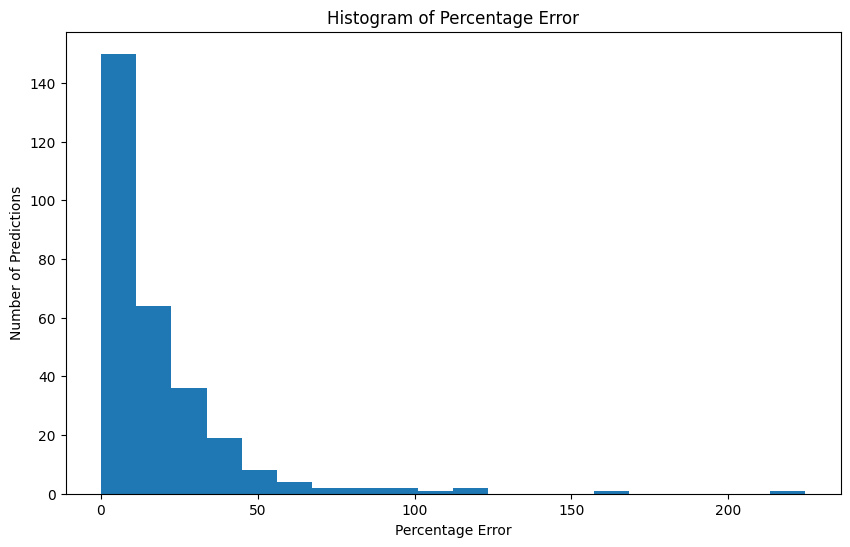

Number of predictions with more than 20% error: 91
Total Predictions : 292


In [ ]:
# prompt: use the model to predict on test set, print predicted value, actual value, and percentage error for each prediction, visualize the histogram of percent error and number of predictions, count the predictions more than 20% error

# Predict on the test set
with torch.no_grad():
    y_pred = model(X_test)

# Inverse transform the predictions and actual values
y_pred = scaler.inverse_transform(y_pred.cpu().numpy())  # Assuming y_pred is a PyTorch tensor
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # y_test is already a NumPy array, reshape it

# Calculate percentage error
percent_error = (np.abs(y_pred - y_test) / y_test) * 100

# Print predicted value, actual value, and percentage error
for i in range(len(y_pred)):
    print(f"Prediction: {y_pred[i][0]:.2f}, Actual: {y_test[i][0]:.2f}, Percentage Error: {percent_error[i][0]:.2f}%")

# Visualize the histogram of percent error
plt.figure(figsize=(10, 6))
plt.hist(percent_error, bins=20)
plt.xlabel('Percentage Error')
plt.ylabel('Number of Predictions')
plt.title('Histogram of Percentage Error')
plt.show()

# Count predictions with more than 20% error
high_error_count = np.sum(percent_error > 20)
print(f"Number of predictions with more than 20% error: {high_error_count}")
print(f"Total Predictions : {len(y_pred)}")
